In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import pandas as pd
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28, 256)
        self.fc2 = nn.Linear(256, 1024)
        self.fc3 = nn.Linear(1024, 2048)
        self.fc4 = nn.Linear(2048, 8192)
        self.fc5 = nn.Linear(8192, 18)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        return x

In [3]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:,0].values
        self.y = df.iloc[:,1].values
        self.length = len(df)

    def __getitem__(self, index):
        x = self.x[index]
        x = list(x)[:-6]
        x = list(map(int, x))
        x = [1 if xi == 1 else -1 for xi in x]
        x = torch.FloatTensor(x)
        y = torch.LongTensor(self.y)[index]
        return x, y

    def __len__(self):
        return self.length

In [4]:
# train_dataset = CustomDataset("./txt/cmp1")
full_dataset = CustomDataset("C:/Users/1998b/Google 드라이브/학부/4학년 2학기/hash/txt/data_Xeon.csv")
# train_dataset = CustomDataset("/content/drive/MyDrive/학부/4학년 2학기/hash/txt/data_Xeon.csv")
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

# train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
# test_dataloader = DataLoader(test_dataset, batch_size=1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Net().to(device)
print(model)

Net(
  (fc1): Linear(in_features=28, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=2048, bias=True)
  (fc4): Linear(in_features=2048, out_features=8192, bias=True)
  (fc5): Linear(in_features=8192, out_features=18, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
losses = []

indices = torch.randperm(len(train_dataset))[:2097152]
sampler = SubsetRandomSampler(indices)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False, drop_last=True, sampler=sampler)

for epoch in range(200):
    cost = 0.0

    # indices = torch.randperm(len(train_dataset))[:131072]
    # sampler = SubsetRandomSampler(indices)
    # train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False, drop_last=True, sampler=sampler)

    for i, batch in enumerate(tqdm(train_dataloader)):
    # for x, y in train_dataloader:
        x = batch[0].to(device)
        y = batch[1].to(device)
        # x = x.to(device)
        # y = y.to(device)
        optimizer.zero_grad()
        
        output = model(x)

        loss = criterion(output, y)

        loss.backward()
        optimizer.step()

        cost += loss

        # print(f"Epoch : {epoch+1:4d}, Loss : {loss:.3f}")

    cost = cost / len(train_dataloader)
    losses.append(cost.item())

    # if (epoch + 1) % 10 == 0:
    #     print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")
    print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")

# torch.save(model.state_dict(), "util/model")
# torch.save(model.state_dict(), "/content/drive/MyDrive/학부/4학년 2학기/hash/txt/cmp1.csv")

100%|██████████| 65536/65536 [03:19<00:00, 327.98it/s]


Epoch :    1, Cost : 2.889


100%|██████████| 65536/65536 [03:18<00:00, 329.86it/s]


Epoch :    2, Cost : 2.889


100%|██████████| 65536/65536 [03:18<00:00, 330.01it/s]


Epoch :    3, Cost : 2.888


100%|██████████| 65536/65536 [03:14<00:00, 337.50it/s]


Epoch :    4, Cost : 2.888


100%|██████████| 65536/65536 [03:14<00:00, 336.66it/s]


Epoch :    5, Cost : 2.888


100%|██████████| 65536/65536 [03:14<00:00, 337.07it/s]


Epoch :    6, Cost : 2.888


100%|██████████| 65536/65536 [03:15<00:00, 336.08it/s]


Epoch :    7, Cost : 2.887


100%|██████████| 65536/65536 [03:15<00:00, 335.65it/s]


Epoch :    8, Cost : 2.887


100%|██████████| 65536/65536 [03:14<00:00, 336.66it/s]


Epoch :    9, Cost : 2.886


100%|██████████| 65536/65536 [03:14<00:00, 336.30it/s]


Epoch :   10, Cost : 2.885


100%|██████████| 65536/65536 [03:15<00:00, 335.12it/s]


Epoch :   11, Cost : 2.884


100%|██████████| 65536/65536 [03:14<00:00, 336.72it/s]


Epoch :   12, Cost : 2.498


100%|██████████| 65536/65536 [03:14<00:00, 336.34it/s]


Epoch :   13, Cost : 1.883


100%|██████████| 65536/65536 [03:15<00:00, 335.41it/s]


Epoch :   14, Cost : 1.860


100%|██████████| 65536/65536 [03:15<00:00, 335.77it/s]


Epoch :   15, Cost : 1.855


100%|██████████| 65536/65536 [03:15<00:00, 335.46it/s]


Epoch :   16, Cost : 1.852


100%|██████████| 65536/65536 [03:15<00:00, 334.74it/s]


Epoch :   17, Cost : 1.851


100%|██████████| 65536/65536 [03:15<00:00, 335.85it/s]


Epoch :   18, Cost : 1.849


100%|██████████| 65536/65536 [03:15<00:00, 334.68it/s]


Epoch :   19, Cost : 1.848


100%|██████████| 65536/65536 [03:15<00:00, 334.82it/s]


Epoch :   20, Cost : 1.848


100%|██████████| 65536/65536 [03:14<00:00, 336.36it/s]


Epoch :   21, Cost : 1.846


100%|██████████| 65536/65536 [03:15<00:00, 335.66it/s]


Epoch :   22, Cost : 1.843


100%|██████████| 65536/65536 [03:15<00:00, 335.57it/s]


Epoch :   23, Cost : 1.834


100%|██████████| 65536/65536 [03:15<00:00, 335.50it/s]


Epoch :   24, Cost : 1.824


100%|██████████| 65536/65536 [03:15<00:00, 335.64it/s]


Epoch :   25, Cost : 1.816


100%|██████████| 65536/65536 [03:15<00:00, 335.32it/s]


Epoch :   26, Cost : 1.811


100%|██████████| 65536/65536 [03:16<00:00, 334.07it/s]


Epoch :   27, Cost : 1.807


100%|██████████| 65536/65536 [03:15<00:00, 334.74it/s]


Epoch :   28, Cost : 1.804


100%|██████████| 65536/65536 [03:15<00:00, 335.42it/s]


Epoch :   29, Cost : 1.802


100%|██████████| 65536/65536 [03:15<00:00, 334.75it/s]


Epoch :   30, Cost : 1.800


100%|██████████| 65536/65536 [03:15<00:00, 335.41it/s]


Epoch :   31, Cost : 1.799


100%|██████████| 65536/65536 [03:16<00:00, 333.81it/s]


Epoch :   32, Cost : 1.798


100%|██████████| 65536/65536 [03:16<00:00, 334.23it/s]


Epoch :   33, Cost : 1.793


100%|██████████| 65536/65536 [03:15<00:00, 334.90it/s]


Epoch :   34, Cost : 1.543


100%|██████████| 65536/65536 [03:15<00:00, 334.48it/s]


Epoch :   35, Cost : 1.214


100%|██████████| 65536/65536 [03:15<00:00, 334.49it/s]


Epoch :   36, Cost : 1.160


100%|██████████| 65536/65536 [03:15<00:00, 334.61it/s]


Epoch :   37, Cost : 1.141


100%|██████████| 65536/65536 [03:16<00:00, 333.92it/s]


Epoch :   38, Cost : 1.132


100%|██████████| 65536/65536 [03:16<00:00, 333.60it/s]


Epoch :   39, Cost : 1.126


100%|██████████| 65536/65536 [03:15<00:00, 334.76it/s]


Epoch :   40, Cost : 1.121


100%|██████████| 65536/65536 [03:16<00:00, 333.88it/s]


Epoch :   41, Cost : 1.116


100%|██████████| 65536/65536 [03:15<00:00, 334.90it/s]


Epoch :   42, Cost : 1.104


100%|██████████| 65536/65536 [03:16<00:00, 334.23it/s]


Epoch :   43, Cost : 1.087


100%|██████████| 65536/65536 [03:16<00:00, 333.90it/s]


Epoch :   44, Cost : 1.061


100%|██████████| 65536/65536 [03:15<00:00, 334.92it/s]


Epoch :   45, Cost : 1.020


100%|██████████| 65536/65536 [03:16<00:00, 334.34it/s]


Epoch :   46, Cost : 0.942


100%|██████████| 65536/65536 [03:16<00:00, 334.27it/s]


Epoch :   47, Cost : 0.874


100%|██████████| 65536/65536 [03:15<00:00, 334.92it/s]


Epoch :   48, Cost : 0.849


100%|██████████| 65536/65536 [03:16<00:00, 334.17it/s]


Epoch :   49, Cost : 0.839


100%|██████████| 65536/65536 [03:20<00:00, 326.57it/s]


Epoch :   50, Cost : 0.832


100%|██████████| 65536/65536 [03:24<00:00, 320.86it/s]


Epoch :   51, Cost : 0.828


100%|██████████| 65536/65536 [03:23<00:00, 321.86it/s]


Epoch :   52, Cost : 0.825


100%|██████████| 65536/65536 [03:23<00:00, 321.75it/s]


Epoch :   53, Cost : 0.823


100%|██████████| 65536/65536 [03:24<00:00, 321.22it/s]


Epoch :   54, Cost : 0.821


100%|██████████| 65536/65536 [03:23<00:00, 321.66it/s]


Epoch :   55, Cost : 0.820


100%|██████████| 65536/65536 [03:24<00:00, 321.25it/s]


Epoch :   56, Cost : 0.819


100%|██████████| 65536/65536 [03:20<00:00, 326.99it/s]


Epoch :   57, Cost : 0.817


100%|██████████| 65536/65536 [03:21<00:00, 325.28it/s]


Epoch :   58, Cost : 0.816


100%|██████████| 65536/65536 [03:24<00:00, 320.94it/s]


Epoch :   59, Cost : 0.815


100%|██████████| 65536/65536 [03:22<00:00, 324.01it/s]


Epoch :   60, Cost : 0.814


100%|██████████| 65536/65536 [03:19<00:00, 328.87it/s]


Epoch :   61, Cost : 0.813


100%|██████████| 65536/65536 [03:18<00:00, 329.46it/s]


Epoch :   62, Cost : 0.812


100%|██████████| 65536/65536 [03:19<00:00, 328.75it/s]


Epoch :   63, Cost : 0.812


100%|██████████| 65536/65536 [03:18<00:00, 330.08it/s]


Epoch :   64, Cost : 0.811


100%|██████████| 65536/65536 [03:14<00:00, 337.53it/s]


Epoch :   65, Cost : 0.809


100%|██████████| 65536/65536 [03:14<00:00, 337.04it/s]


Epoch :   66, Cost : 0.809


100%|██████████| 65536/65536 [03:14<00:00, 337.72it/s]


Epoch :   67, Cost : 0.807


100%|██████████| 65536/65536 [03:14<00:00, 336.73it/s]


Epoch :   68, Cost : 0.806


100%|██████████| 65536/65536 [03:14<00:00, 337.60it/s]


Epoch :   69, Cost : 0.805


100%|██████████| 65536/65536 [03:14<00:00, 337.21it/s]


Epoch :   70, Cost : 0.803


100%|██████████| 65536/65536 [03:16<00:00, 333.49it/s]


Epoch :   71, Cost : 0.802


100%|██████████| 65536/65536 [03:16<00:00, 334.07it/s]


Epoch :   72, Cost : 0.799


100%|██████████| 65536/65536 [03:14<00:00, 336.91it/s]


Epoch :   73, Cost : 0.796


100%|██████████| 65536/65536 [03:14<00:00, 337.31it/s]


Epoch :   74, Cost : 0.791


100%|██████████| 65536/65536 [03:13<00:00, 337.95it/s]


Epoch :   75, Cost : 0.786


100%|██████████| 65536/65536 [03:14<00:00, 336.74it/s]


Epoch :   76, Cost : 0.783


100%|██████████| 65536/65536 [03:19<00:00, 328.13it/s]


Epoch :   77, Cost : 0.778


100%|██████████| 65536/65536 [03:20<00:00, 326.72it/s]


Epoch :   78, Cost : 0.774


100%|██████████| 65536/65536 [03:21<00:00, 325.51it/s]


Epoch :   79, Cost : 0.767


100%|██████████| 65536/65536 [03:21<00:00, 325.48it/s]


Epoch :   80, Cost : 0.757


100%|██████████| 65536/65536 [03:15<00:00, 334.65it/s]


Epoch :   81, Cost : 0.739


100%|██████████| 65536/65536 [03:16<00:00, 333.54it/s]


Epoch :   82, Cost : 0.714


100%|██████████| 65536/65536 [03:16<00:00, 333.23it/s]


Epoch :   83, Cost : 0.690


100%|██████████| 65536/65536 [03:15<00:00, 335.44it/s]


Epoch :   84, Cost : 0.670


100%|██████████| 65536/65536 [03:15<00:00, 334.51it/s]


Epoch :   85, Cost : 0.656


100%|██████████| 65536/65536 [03:16<00:00, 334.21it/s]


Epoch :   86, Cost : 0.645


100%|██████████| 65536/65536 [03:15<00:00, 335.82it/s]


Epoch :   87, Cost : 0.637


100%|██████████| 65536/65536 [03:15<00:00, 334.41it/s]


Epoch :   88, Cost : 0.631


100%|██████████| 65536/65536 [03:16<00:00, 333.75it/s]


Epoch :   89, Cost : 0.625


100%|██████████| 65536/65536 [03:15<00:00, 335.68it/s]


Epoch :   90, Cost : 0.603


100%|██████████| 65536/65536 [03:15<00:00, 334.53it/s]


Epoch :   91, Cost : 0.244


100%|██████████| 65536/65536 [03:16<00:00, 334.36it/s]


Epoch :   92, Cost : 0.138


100%|██████████| 65536/65536 [03:15<00:00, 335.77it/s]


Epoch :   93, Cost : 0.115


100%|██████████| 65536/65536 [03:18<00:00, 330.61it/s]


Epoch :   94, Cost : 0.104


100%|██████████| 65536/65536 [03:15<00:00, 335.15it/s]


Epoch :   95, Cost : 0.095


100%|██████████| 65536/65536 [03:15<00:00, 335.74it/s]


Epoch :   96, Cost : 0.091


100%|██████████| 65536/65536 [03:15<00:00, 334.43it/s]


Epoch :   97, Cost : 0.086


100%|██████████| 65536/65536 [03:15<00:00, 334.89it/s]


Epoch :   98, Cost : 0.081


100%|██████████| 65536/65536 [03:14<00:00, 336.40it/s]


Epoch :   99, Cost : 0.078


100%|██████████| 65536/65536 [03:15<00:00, 334.59it/s]


Epoch :  100, Cost : 0.076


100%|██████████| 65536/65536 [03:15<00:00, 335.04it/s]


Epoch :  101, Cost : 0.073


100%|██████████| 65536/65536 [03:15<00:00, 335.91it/s]


Epoch :  102, Cost : 0.071


100%|██████████| 65536/65536 [03:15<00:00, 335.89it/s]


Epoch :  103, Cost : 0.069


100%|██████████| 65536/65536 [03:15<00:00, 334.80it/s]


Epoch :  104, Cost : 0.068


100%|██████████| 65536/65536 [03:14<00:00, 336.16it/s]


Epoch :  105, Cost : 0.064


100%|██████████| 65536/65536 [03:15<00:00, 334.95it/s]


Epoch :  106, Cost : 0.061


100%|██████████| 65536/65536 [03:15<00:00, 335.02it/s]


Epoch :  107, Cost : 0.058


100%|██████████| 65536/65536 [03:15<00:00, 336.01it/s]


Epoch :  108, Cost : 0.059


100%|██████████| 65536/65536 [03:15<00:00, 334.45it/s]


Epoch :  109, Cost : 0.062


100%|██████████| 65536/65536 [03:15<00:00, 334.70it/s]


Epoch :  110, Cost : 0.060


100%|██████████| 65536/65536 [03:19<00:00, 328.81it/s]


Epoch :  111, Cost : 0.055


100%|██████████| 65536/65536 [03:22<00:00, 323.84it/s]


Epoch :  112, Cost : 0.053


100%|██████████| 65536/65536 [03:21<00:00, 325.21it/s]


Epoch :  113, Cost : 0.051


100%|██████████| 65536/65536 [03:23<00:00, 321.28it/s]


Epoch :  114, Cost : 0.051


100%|██████████| 65536/65536 [03:26<00:00, 316.97it/s]


Epoch :  115, Cost : 0.049


100%|██████████| 65536/65536 [03:22<00:00, 324.36it/s]


Epoch :  116, Cost : 0.047


100%|██████████| 65536/65536 [03:21<00:00, 325.60it/s]


Epoch :  117, Cost : 0.049


100%|██████████| 65536/65536 [03:23<00:00, 322.78it/s]


Epoch :  118, Cost : 0.044


100%|██████████| 65536/65536 [03:14<00:00, 336.78it/s]


Epoch :  119, Cost : 0.040


100%|██████████| 65536/65536 [03:12<00:00, 339.99it/s]


Epoch :  120, Cost : 0.043


100%|██████████| 65536/65536 [03:26<00:00, 317.42it/s]


Epoch :  121, Cost : 0.041


100%|██████████| 65536/65536 [03:23<00:00, 321.94it/s]


Epoch :  122, Cost : 0.040


100%|██████████| 65536/65536 [03:23<00:00, 321.27it/s]


Epoch :  123, Cost : 0.037


100%|██████████| 65536/65536 [03:21<00:00, 325.76it/s]


Epoch :  124, Cost : 0.039


100%|██████████| 65536/65536 [03:20<00:00, 327.37it/s]


Epoch :  125, Cost : 0.038


100%|██████████| 65536/65536 [03:17<00:00, 332.33it/s]


Epoch :  126, Cost : 0.037


100%|██████████| 65536/65536 [03:21<00:00, 325.91it/s]


Epoch :  127, Cost : 0.032


100%|██████████| 65536/65536 [03:16<00:00, 332.78it/s]


Epoch :  128, Cost : 0.027


100%|██████████| 65536/65536 [03:17<00:00, 331.64it/s]


Epoch :  129, Cost : 0.025


100%|██████████| 65536/65536 [03:22<00:00, 323.13it/s]


Epoch :  130, Cost : 0.030


100%|██████████| 65536/65536 [03:22<00:00, 323.22it/s]


Epoch :  131, Cost : 0.030


100%|██████████| 65536/65536 [03:19<00:00, 329.10it/s]


Epoch :  132, Cost : 0.033


100%|██████████| 65536/65536 [03:40<00:00, 296.73it/s]


Epoch :  133, Cost : 0.028


100%|██████████| 65536/65536 [03:27<00:00, 316.40it/s]


Epoch :  134, Cost : 0.025


100%|██████████| 65536/65536 [03:12<00:00, 340.55it/s]


Epoch :  135, Cost : 0.023


100%|██████████| 65536/65536 [03:18<00:00, 329.84it/s]


Epoch :  136, Cost : 0.025


100%|██████████| 65536/65536 [03:16<00:00, 332.92it/s]


Epoch :  137, Cost : 0.024


100%|██████████| 65536/65536 [03:13<00:00, 338.78it/s]


Epoch :  138, Cost : 0.027


100%|██████████| 65536/65536 [03:13<00:00, 337.85it/s]


Epoch :  139, Cost : 0.018


100%|██████████| 65536/65536 [03:14<00:00, 336.74it/s]


Epoch :  140, Cost : 0.023


100%|██████████| 65536/65536 [03:12<00:00, 339.91it/s]


Epoch :  141, Cost : 0.025


100%|██████████| 65536/65536 [03:23<00:00, 321.41it/s]


Epoch :  142, Cost : 0.020


100%|██████████| 65536/65536 [03:22<00:00, 322.87it/s]


Epoch :  143, Cost : 0.025


100%|██████████| 65536/65536 [03:18<00:00, 329.81it/s]


Epoch :  144, Cost : 0.018


100%|██████████| 65536/65536 [03:18<00:00, 329.69it/s]


Epoch :  145, Cost : 0.019


100%|██████████| 65536/65536 [03:28<00:00, 314.74it/s]


Epoch :  146, Cost : 0.023


100%|██████████| 65536/65536 [03:20<00:00, 326.07it/s]


Epoch :  147, Cost : 0.020


100%|██████████| 65536/65536 [03:21<00:00, 325.07it/s]


Epoch :  148, Cost : 0.013


100%|██████████| 65536/65536 [03:21<00:00, 325.88it/s]


Epoch :  149, Cost : 0.018


100%|██████████| 65536/65536 [03:19<00:00, 328.47it/s]


Epoch :  150, Cost : 0.019


100%|██████████| 65536/65536 [03:16<00:00, 333.44it/s]


Epoch :  151, Cost : 0.015


100%|██████████| 65536/65536 [03:17<00:00, 332.00it/s]


Epoch :  152, Cost : 0.010


100%|██████████| 65536/65536 [03:17<00:00, 332.10it/s]


Epoch :  153, Cost : 0.019


100%|██████████| 65536/65536 [03:16<00:00, 333.12it/s]


Epoch :  154, Cost : 0.016


100%|██████████| 65536/65536 [03:17<00:00, 331.78it/s]


Epoch :  155, Cost : 0.012


100%|██████████| 65536/65536 [03:17<00:00, 332.34it/s]


Epoch :  156, Cost : 0.012


100%|██████████| 65536/65536 [03:17<00:00, 332.61it/s]


Epoch :  157, Cost : 0.013


100%|██████████| 65536/65536 [03:16<00:00, 332.68it/s]


Epoch :  158, Cost : 0.016


100%|██████████| 65536/65536 [03:17<00:00, 332.12it/s]


Epoch :  159, Cost : 0.013


100%|██████████| 65536/65536 [03:16<00:00, 332.76it/s]


Epoch :  160, Cost : 0.016


100%|██████████| 65536/65536 [03:17<00:00, 331.22it/s]


Epoch :  161, Cost : 0.016


100%|██████████| 65536/65536 [03:17<00:00, 332.64it/s]


Epoch :  162, Cost : 0.012


100%|██████████| 65536/65536 [03:17<00:00, 331.93it/s]


Epoch :  163, Cost : 0.010


100%|██████████| 65536/65536 [03:17<00:00, 332.12it/s]


Epoch :  164, Cost : 0.007


100%|██████████| 65536/65536 [03:17<00:00, 331.68it/s]


Epoch :  165, Cost : 0.009


100%|██████████| 65536/65536 [03:17<00:00, 331.04it/s]


Epoch :  166, Cost : 0.016


100%|██████████| 65536/65536 [03:16<00:00, 332.70it/s]


Epoch :  167, Cost : 0.011


100%|██████████| 65536/65536 [03:17<00:00, 332.20it/s]


Epoch :  168, Cost : 0.015


100%|██████████| 65536/65536 [03:17<00:00, 331.29it/s]


Epoch :  169, Cost : 0.010


100%|██████████| 65536/65536 [03:16<00:00, 332.75it/s]


Epoch :  170, Cost : 0.007


100%|██████████| 65536/65536 [03:17<00:00, 331.91it/s]


Epoch :  171, Cost : 0.007


100%|██████████| 65536/65536 [03:17<00:00, 332.20it/s]


Epoch :  172, Cost : 0.009


100%|██████████| 65536/65536 [03:17<00:00, 331.85it/s]


Epoch :  173, Cost : 0.010


100%|██████████| 65536/65536 [03:17<00:00, 331.84it/s]


Epoch :  174, Cost : 0.009


100%|██████████| 65536/65536 [03:17<00:00, 332.60it/s]


Epoch :  175, Cost : 0.007


100%|██████████| 65536/65536 [03:16<00:00, 332.97it/s]


Epoch :  176, Cost : 0.011


100%|██████████| 65536/65536 [03:17<00:00, 331.93it/s]


Epoch :  177, Cost : 0.012


100%|██████████| 65536/65536 [03:17<00:00, 332.22it/s]


Epoch :  178, Cost : 0.009


100%|██████████| 65536/65536 [03:17<00:00, 331.37it/s]


Epoch :  179, Cost : 0.007


100%|██████████| 65536/65536 [03:17<00:00, 331.50it/s]


Epoch :  180, Cost : 0.005


100%|██████████| 65536/65536 [03:17<00:00, 332.16it/s]


Epoch :  181, Cost : 0.006


100%|██████████| 65536/65536 [03:17<00:00, 331.58it/s]


Epoch :  182, Cost : 0.006


100%|██████████| 65536/65536 [03:18<00:00, 330.47it/s]


Epoch :  183, Cost : 0.004


100%|██████████| 65536/65536 [03:17<00:00, 331.70it/s]


Epoch :  184, Cost : 0.009


100%|██████████| 65536/65536 [03:18<00:00, 330.83it/s]


Epoch :  185, Cost : 0.012


100%|██████████| 65536/65536 [03:17<00:00, 332.03it/s]


Epoch :  186, Cost : 0.016


100%|██████████| 65536/65536 [03:17<00:00, 332.46it/s]


Epoch :  187, Cost : 0.008


100%|██████████| 65536/65536 [03:17<00:00, 331.40it/s]


Epoch :  188, Cost : 0.010


100%|██████████| 65536/65536 [03:16<00:00, 332.87it/s]


Epoch :  189, Cost : 0.008


100%|██████████| 65536/65536 [03:17<00:00, 331.68it/s]


Epoch :  190, Cost : 0.013


100%|██████████| 65536/65536 [03:17<00:00, 332.19it/s]


Epoch :  191, Cost : 0.008


100%|██████████| 65536/65536 [03:17<00:00, 332.38it/s]


Epoch :  192, Cost : 0.010


100%|██████████| 65536/65536 [03:17<00:00, 331.07it/s]


Epoch :  193, Cost : 0.007


100%|██████████| 65536/65536 [03:17<00:00, 330.99it/s]


Epoch :  194, Cost : 0.014


100%|██████████| 65536/65536 [03:17<00:00, 331.94it/s]


Epoch :  195, Cost : 0.011


100%|██████████| 65536/65536 [03:17<00:00, 331.60it/s]


Epoch :  196, Cost : 0.008


100%|██████████| 65536/65536 [03:17<00:00, 331.92it/s]


Epoch :  197, Cost : 0.006


100%|██████████| 65536/65536 [03:17<00:00, 331.70it/s]


Epoch :  198, Cost : 0.007


100%|██████████| 65536/65536 [03:17<00:00, 331.02it/s]


Epoch :  199, Cost : 0.008


100%|██████████| 65536/65536 [03:17<00:00, 332.19it/s]

Epoch :  200, Cost : 0.006


In [10]:
print(losses)

[2.886584520339966, 2.883960008621216, 2.881700277328491, 2.879897117614746, 2.8787429332733154, 2.8774070739746094, 2.876115560531616, 2.8746325969696045, 2.8730592727661133, 2.8722238540649414, 2.870922327041626, 2.8697917461395264, 2.868736982345581, 2.8676302433013916, 2.865941286087036, 2.8651130199432373, 2.8638875484466553]


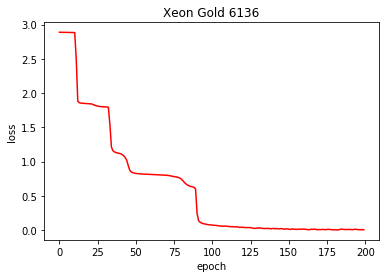

100%|██████████| 200000/200000 [02:47<00:00, 1196.04it/s]

--------------
Accuracy:  97.90299999999999


In [8]:
# losses_int = [ts.item() for ts in losses]
plt.plot(losses, 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Xeon Gold 6136')
plt.savefig('foo.png')
plt.show()

indices = torch.randperm(len(test_dataset))[:200000]
sampler = SubsetRandomSampler(indices)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, drop_last=True, sampler=sampler)

# test_dataloader = DataLoader(test_dataset, batch_size=1)

# GET OUTPUT
with torch.no_grad():
    model.eval()
    
    total = 0
    correct = 0

    for i, batch in enumerate(tqdm(test_dataloader)):
        x = batch[0].to(device)
        y = batch[1].to(device)
        # x = x.to(device)
        # y = y.to(device)
        output = model(x)
        y_pred = torch.argmax(output, dim=1).to(device)
        total += 1
        # print(x, y, y_pred)
        if (y == y_pred): 
            correct += 1

print('--------------')
print('Accuracy: ', correct / total * 100)